# Introduction
**This will be your workspace for Kaggle's Machine Learning education track.**

You will build and continually improve a model to predict housing prices as you work through each tutorial.  Fork this notebook and write your code in it.

The data from the tutorial, the Melbourne data, is not available in this workspace.  You will need to translate the concepts to work with the data in this notebook, the Iowa data.

Come to the [Learn Discussion](https://www.kaggle.com/learn-forum) forum for any questions or comments. 

# Write Your Code Below



In [ ]:
import pandas as pd

main_file_path = '../input/train.csv'
data = pd.read_csv(main_file_path)
print(data.describe())
# print(data)

In [ ]:
print(data.columns)

In [ ]:
data_price_copy = data.SalePrice
print(data.SalePrice.head())
# data_price_copy[0] = 208500
# print(data.SalePrice.head())

In [ ]:
from sklearn.tree import DecisionTreeRegressor

y = data.SalePrice
five_columns = data[['LotArea', 'YearBuilt', '1stFlrSF', '2ndFlrSF', 'FullBath', 'BedroomAbvGr', 'TotRmsAbvGrd']]
X = five_columns

house_price_model = DecisionTreeRegressor()

house_price_model.fit(X, y)

print('make some predictions:')

print(X.head())
print(house_price_model.predict(X.head()))

In [ ]:
print(y)

In [ ]:
from sklearn.metrics import mean_absolute_error

predict_house_price = house_price_model.predict(X)
mean_absolute_error(y, predict_house_price)

In [ ]:
from sklearn.model_selection import train_test_split

train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=0)

house_price_model2 = DecisionTreeRegressor()
house_price_model2.fit(train_X, train_y)

predict_house_price2 = house_price_model2.predict(val_X)
mean_absolute_error(val_y, predict_house_price2)

In [ ]:
def get_mae(max_leaf_nodes, predictors_train, predictors_val, targ_train, targ_val):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(predictors_train, targ_train)
    pred_val = model.predict(predictors_val)
    mae = mean_absolute_error(targ_val, pred_val)
    return mae

In [ ]:
for max_leaf_nodes in [5, 50, 500, 5000]:
    my_mae = get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y)
    print("Max leaf nodes are %d:       Mean absolute error:%d" %(max_leaf_nodes, my_mae))

In [ ]:
from sklearn.ensemble import RandomForestRegressor

forest_model = RandomForestRegressor()
forest_model.fit(train_X, train_y)
preds_y = forest_model.predict(val_X)
mae = mean_absolute_error(val_y, preds_y)
print(mae)

In [ ]:
forest_model.fit(X, y)

# 读取测试文件
test = pd.read_csv('../input/test.csv')
test_X = test[['LotArea', 'YearBuilt', '1stFlrSF', '2ndFlrSF', 'FullBath', 'BedroomAbvGr', 'TotRmsAbvGrd']]

test_y = forest_model.predict(test_X)
my_submission = pd.DataFrame({'Id': test.Id, 'SalePrice': test_y})

# 生成提交文件
my_submission.to_csv('submission.csv', index = False)

In [ ]:
# ----------------------------------------------------
# Level2
# ----------------------------------------------------

In [ ]:
# import 
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Imputer

In [ ]:
# 读取数据，只保留数值型
train = pd.read_csv('../input/train.csv')
test_org = pd.read_csv('../input/test.csv')

train_target = train.SalePrice

# 去掉Id列
train_predictors = train.drop(['SalePrice', 'Id'], axis=1).select_dtypes(exclude=['object'])
print(train_predictors.columns)
test = test_org[train_predictors.columns]
print(test.head())

In [ ]:
# find some columns with missing values in your dataset
train_cols_with_miss = [col for col in train_predictors.columns if train_predictors[col].isnull().any()]
print(train_cols_with_miss)
test_cols_with_miss = [col for col in test if test[col].isnull().any()]
print(test_cols_with_miss)

In [ ]:
# Use the Imputer class to impute missing values

In [ ]:
imputed_X_train_plus = train_predictors.copy()
imputed_X_test_plus = test.copy()

for col in train_cols_with_miss:
    imputed_X_train_plus[col + '_with_missing'] = imputed_X_train_plus[col].isnull()
    imputed_X_test_plus[col + '_with_missing'] = imputed_X_test_plus[col].isnull()


print(imputed_X_train_plus.shape)
print(imputed_X_train_plus.columns)
    
# Imputer
my_imputer = Imputer()
imputed_X_train = my_imputer.fit_transform(imputed_X_train_plus)
imputed_X_test = my_imputer.transform(imputed_X_test_plus)

# print(imputed_X_train)

# print(imputed_X_test)

def get_mae(n_estimators, train_X, train_y, val_X, val_y):
    model = train_model(n_estimators, train_X, train_y)
    preds = get_preds(model, val_X)
    mae = mean_absolute_error(val_y, preds)
    return mae

def train_model(n_estimators, train_X, train_y):
    model = RandomForestRegressor(n_estimators)
    model.fit(train_X, train_y)
    return model

def get_preds(model, val_X):
    preds = model.predict(val_X)
    return preds

imputed_X_train = pd.DataFrame(imputed_X_train, columns=imputed_X_train_plus.columns)    

# 添加非数值型特征
some_cols = ['MSZoning', 'Utilities', 'Condition1', 'BldgType', 'HouseStyle', 'MasVnrType', 'HeatingQC', 'CentralAir', 'KitchenQual', 'PoolQC', 'MiscFeature']
imputed_X_train = pd.concat([imputed_X_train, pd.get_dummies(train[some_cols])], axis=1)
print(imputed_X_train.shape)
# 从给出的数据集中，划分训练集和测试集，以确定最好的评估器的个数，最后再以总体数据作为训练集进行训练
train_X, val_X, train_y, val_y = train_test_split(imputed_X_train, train_target, random_state=0)
# print(val_y.isnull().sum())
# train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=0)

for n in [10, 15, 20, 25, 30, 35, 40, 45, 50]:
    mae = get_mae(n, train_X, train_y, val_X, val_y)
    print("n = %d: \t\tmae value:%d" % (n, mae))

# model = train_model(10, train_X, train_y)
# preds = get_preds(model, val_X)
# print(preds)
# mae = mean_absolute_error(val_y, preds)


In [ ]:
# sub_data = pd.read_csv('submission2.csv')
# print(sub_data)

In [ ]:
model = train_model(50, imputed_X_train, train_target)
imputed_X_test = pd.DataFrame(imputed_X_test, columns=imputed_X_test_plus.columns)
# print(type(pd.get_dummies(test_org[some_cols])))
train_dummies, test_dummies = pd.get_dummies(train[some_cols]).align(pd.get_dummies(test_org[some_cols]), join='left', axis=1)
# print(test_dummies[0].shape)
test_dummies.fillna(0, inplace=True)
print(test_dummies.isnull().head())
imputed_X_test = pd.concat([imputed_X_test, test_dummies], axis=1)
# imputed_X_test.fillna(0)
# imputed_X_test = imputed_X_train.align(imputed_X_test, join='left', axis=1)
# print(imputed_X_test.isnull())
preds = model.predict(imputed_X_test)

# my_submission = pd.DataFrame({'Id': test_org.Id, 'SalePrice': preds})
# my_submission.to_csv('submission4.csv', index=False)

In [ ]:
###########################################
# 添加非数值型特征 #
###########################################

In [ ]:
my_submission = pd.DataFrame({'Id': test_org.Id, 'SalePrice': preds})
my_submission.to_csv('submission4.csv', index=False)


In [ ]:
# train_dum = pd.get_dummies(train[some_cols])
# print(list(train_dum.columns))
# # test_dum = pd.get_dummies(test_org[some_cols])
# # print(test_dum.shape)
# # print(list(train_dum.columns) - list(test_dum.shape))
# set1 = set(list(train_dum))
# set2 = set(list(test_dum))
# print(set1 & set2)

In [ ]:
###########################################
# 使用XGBoost #
###########################################

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Imputer
from sklearn.metrics import mean_absolute_error
from xgboost import XGBRegressor

train_data = pd.read_csv('../input/train.csv')
test_org = pd.read_csv('../input/test.csv')

final_test_data = test_org.drop(['Id'], axis=1)
train_data.dropna(axis = 0, subset=['SalePrice'], inplace=True)

y  = train_data.SalePrice
X = train_data.drop(['SalePrice', 'Id'], axis=1).select_dtypes(exclude=['object'])
final_test_data = final_test_data.select_dtypes(exclude=['object'])

# object类型的列
train_object = pd.get_dummies(train_data.select_dtypes(include=['object']))
test_object = pd.get_dummies(test_org.select_dtypes(include=['object']))
train_object, test_object = train_object.align(test_object, join='left', axis=1)

# 组合起来
X = pd.concat([X, train_object], axis=1)
final_test_data = pd.concat([final_test_data, test_object], axis=1)
final_test_data.fillna(0, inplace=True)
print(final_test_data.head())

# print(y.as_matrix())

train_X, test_X, train_y, test_y = train_test_split(X.as_matrix(), y.as_matrix(), test_size=0.25)

my_imputer = Imputer()
# train_X = my_imputer.fit_transform(train_X)
# test_X = my_imputer.transform(test_X)
# final_test_data = my_imputer.transform(final_test_data)

# my_model = XGBRegressor()
# my_model.fit(train_X, train_y, verbose=False)

my_model = XGBRegressor(n_estimators=1000, learning_rate=0.05)
# my_model.fit(train_X, train_y, early_stopping_rounds=300, eval_set=[(test_X, test_y)], verbose=True)

X = my_imputer.fit_transform(X)
print(final_test_data.shape)
final_test_data = my_imputer.transform(final_test_data)
my_model.fit(X, y, verbose=True)

In [ ]:
# predictions = my_model.predict(test_X)
# print("mae: %d" % (mean_absolute_error(predictions, test_y)))

predictions = my_model.predict(final_test_data)

submission = pd.DataFrame({'Id': test_org.Id, 'SalePrice': predictions})
submission.to_csv('submission5.csv', index=False)

In [ ]:
# 视图

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble.partial_dependence import partial_dependence, plot_partial_dependence
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Imputer
from sklearn.ensemble import GradientBoostingRegressor
# from xgboost import XGBRegressor

In [ ]:
train_org = pd.read_csv('../input/train.csv')
test_org = pd.read_csv('../input/test.csv')

print(train_org.shape)

In [ ]:
train_org.select_dtypes(exclude=['object']).columns

In [ ]:
def get_some_data():
    cols_to_use = ['MSSubClass', 'LotFrontage', 'OverallQual']
    train_org = pd.read_csv('../input/train.csv')
    y = train_org.SalePrice
    X = train_org[cols_to_use]
    my_imputer = Imputer()
    X = my_imputer.fit_transform(X)
    return X, y

In [ ]:
X, y = get_some_data()

my_model = GradientBoostingRegressor()
my_model.fit(X, y)

my_plots = plot_partial_dependence(my_model,
                                   features=[0, 1, 2],
                                   X=X,
                                   feature_names=['MSSubClass', 'LotFrontage', 'OverallQual'],
                                   grid_resolution=10)

In [ ]:
## 分析

In [1]:
import pandas as pd
import numpy as ny
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


In [2]:
train_org = pd.read_csv('../input/train.csv')

In [3]:
train_org.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

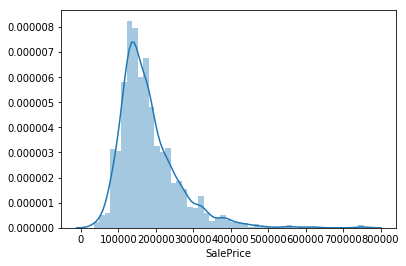

In [4]:
sns.distplot(train_org['SalePrice'])

In [5]:
print(train_org['SalePrice'].skew())
print(train_org['SalePrice'].kurt())

1.8828757597682129
6.536281860064529


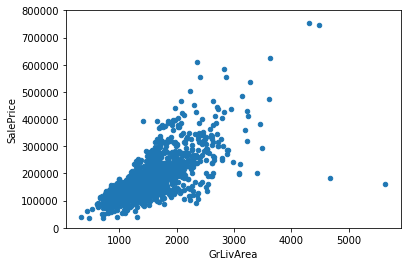

In [6]:
var = 'GrLivArea'
data = pd.concat([train_org['SalePrice'], train_org[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0, 800000))

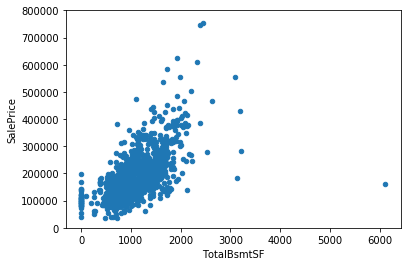

In [7]:
var = 'TotalBsmtSF'
data = pd.concat([train_org['SalePrice'], train_org[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0, 800000))

(-0.5, 9.5, 0, 800000)

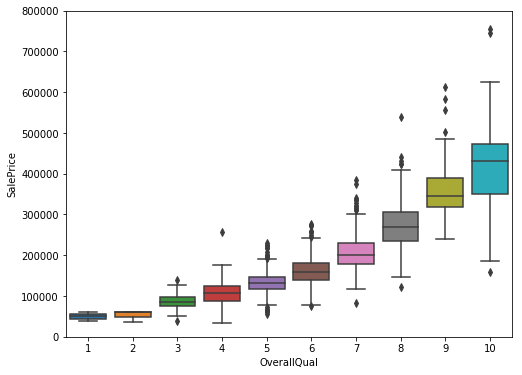

In [8]:
var = 'OverallQual'
data = pd.concat([train_org['SalePrice'], train_org[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y='SalePrice', data=data)
fig.axis(ymin=0, ymax=800000)

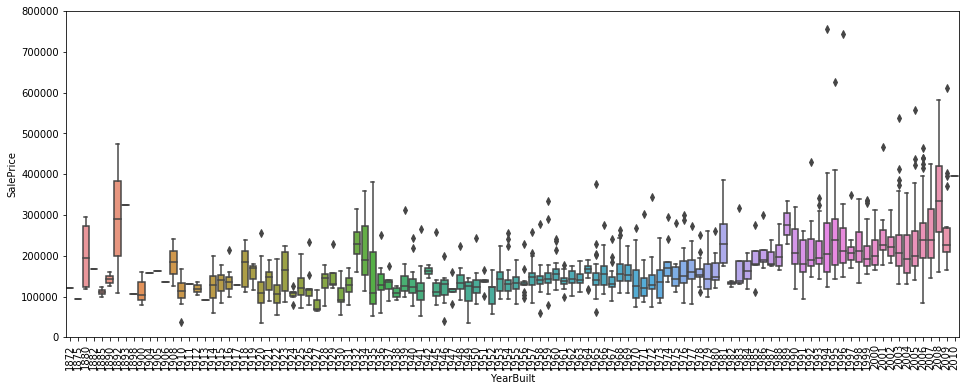

In [9]:
var = 'YearBuilt'
data = pd.concat([train_org['SalePrice'], train_org[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 6))
fig = sns.boxplot(x=var, y='SalePrice', data=data)
fig.axis(ymin=0, ymax=800000)
plt.xticks(rotation=90);

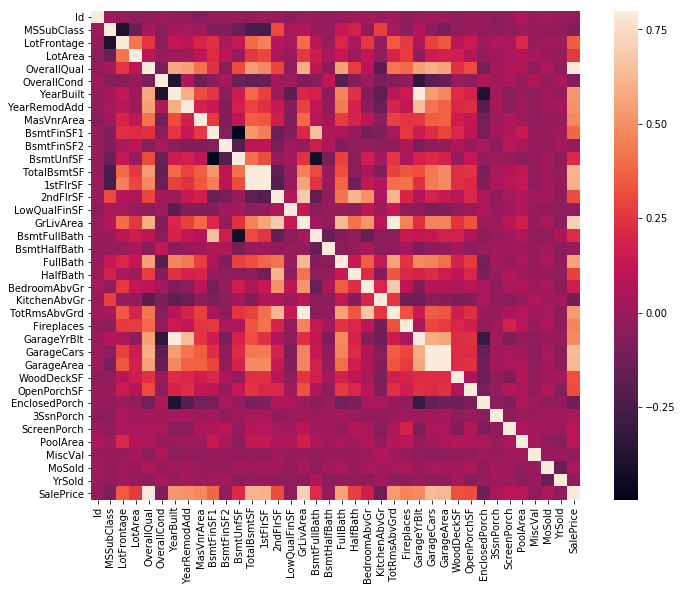

In [10]:
corrmat = train_org.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)

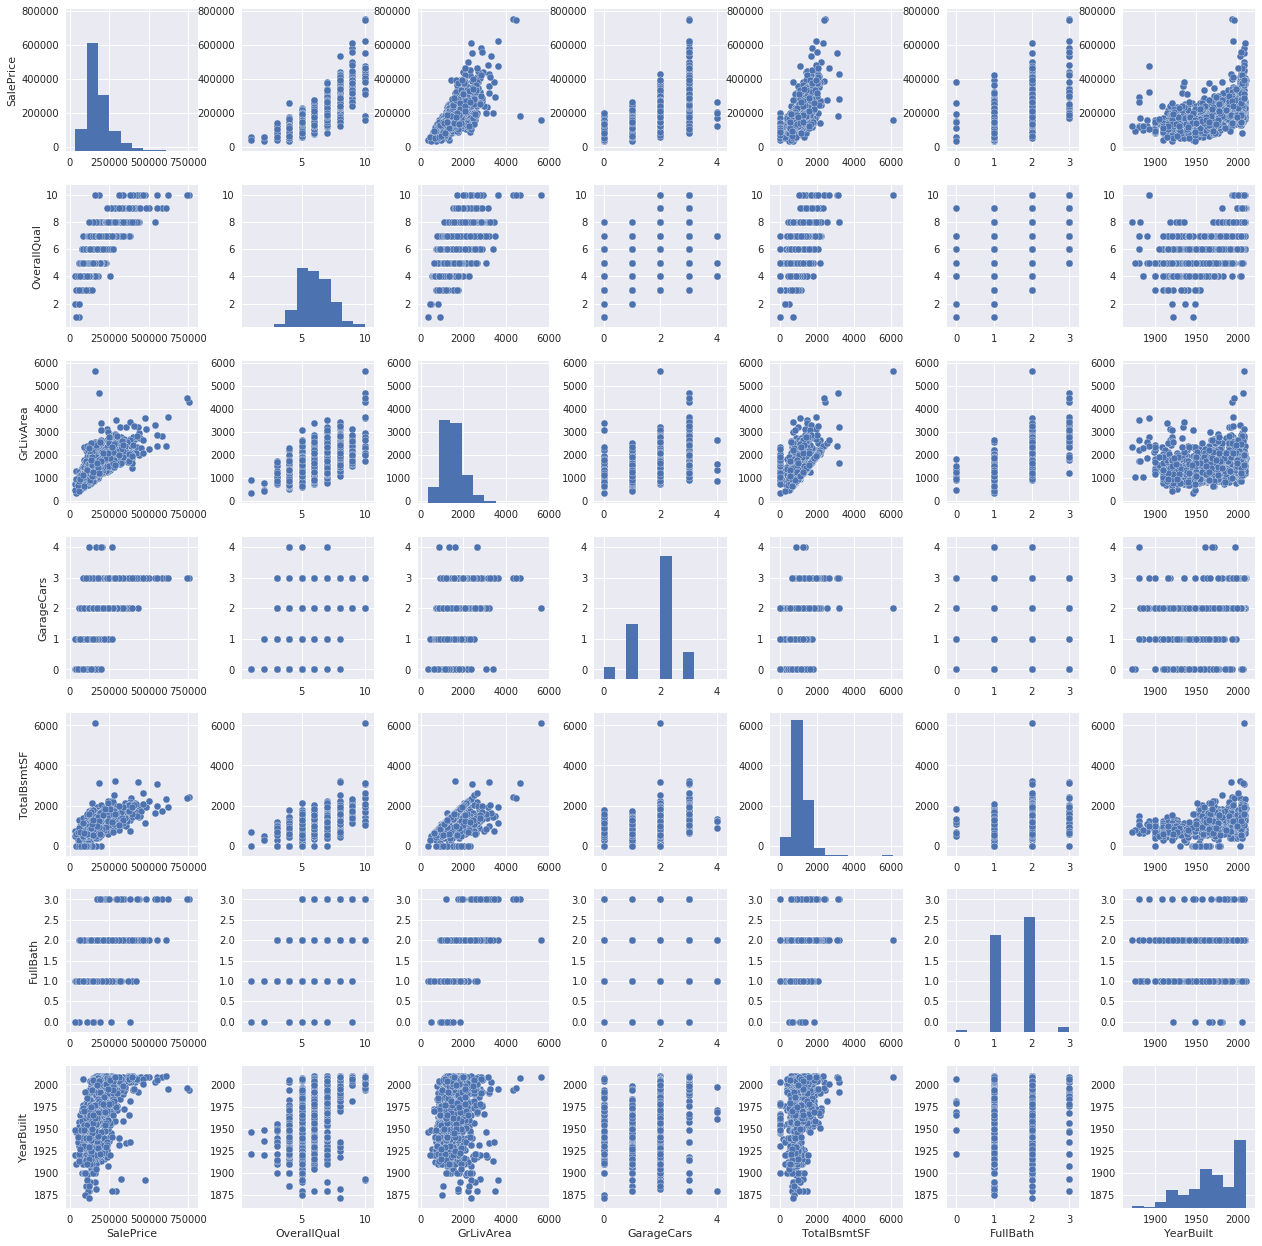

In [12]:
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(train_org[cols], size = 2.5)
plt.show()

In [34]:
total = train_org.isnull().sum().sort_values(ascending=False)
count = train_org.isnull().count()
# print(type(total))
# print(train_org.count())
percent = (train_org.isnull().sum()/train_org.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


In [35]:
# 从缺失值统计图，去掉超过15%的特征列， 所以去掉的特征列有：PoolQC, MiscFeature, Alley, Fence, FireplaceQu, LotFrontage

In [48]:
train_data = train_org.drop((missing_data[missing_data['Total'] > 1]).index, 1)
print(train_data.shape)
# print(train_org.loc[train_data['Electrical'].isnull()])
train_data = train_data.drop(train_org.loc[train_data['Electrical'].isnull()].index)
train_data.isnull().sum().max()

(1460, 63)


0

In [69]:
#standardizing data
saleprice_scaled = StandardScaler().fit_transform(train_org['SalePrice'][:,np.newaxis])
print(saleprice_scaled.shape)
print(saleprice_scaled[:,0])
low_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][:10]
high_range= saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

(1460, 1)
[ 0.34727322  0.00728832  0.53615372 ...  1.07761115 -0.48852299
 -0.42084081]
outer range (low) of the distribution:
[[-1.83870376]
 [-1.83352844]
 [-1.80092766]
 [-1.78329881]
 [-1.77448439]
 [-1.62337999]
 [-1.61708398]
 [-1.58560389]
 [-1.58560389]
 [-1.5731    ]]

outer range (high) of the distribution:
[[3.82897043]
 [4.04098249]
 [4.49634819]
 [4.71041276]
 [4.73032076]
 [5.06214602]
 [5.42383959]
 [5.59185509]
 [7.10289909]
 [7.22881942]]
